<a href="https://colab.research.google.com/github/yuione51/sample/blob/main/Payment_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np

# 데이터셋 생성
np.random.seed(42)

# 날짜 생성
dates = pd.date_range(start='2022-01-01', end='2023-09-30', freq='D')

# 각 날짜에 여러 거래가 발생하도록 조정
num_transactions_per_day = np.random.poisson(10, len(dates))  # 각 날짜별 거래 수를 포아송 분포로 생성
dates = np.repeat(dates, num_transactions_per_day)

# 고객 ID 생성
customer_ids = np.random.choice(range(1000, 1100), size=len(dates))

# 결제 금액 생성
payment_amounts = np.random.choice([100, 200, 300, 400, 500], size=len(dates))

# 오류 코드 생성
error_prob = [0.85, 0.05, 0.05, 0.05]  # 오류가 발생할 확률 조정
error_codes = np.random.choice([np.nan, '금액 불일치', '중복 결제', '결제 실패'], size=len(dates), p=error_prob)

# 특정 날짜에 오류 집중 패턴 생성
error_dates = pd.to_datetime(['2022-03-15', '2022-05-20', '2022-09-10', '2023-01-25'])
for error_date in error_dates:
    error_indices = np.where(dates == error_date)[0]
    num_errors = len(error_indices)
    error_codes[error_indices] = np.random.choice(['금액 불일치', '중복 결제', '결제 실패'], size=num_errors, p=[0.5, 0.3, 0.2])

# 수정 여부 생성
modification_status = np.where(pd.isna(error_codes), '정상', '수정 필요')

# 데이터프레임 생성
data = pd.DataFrame({
    '결제일자': dates,
    '고객 ID': customer_ids,
    '결제 금액': payment_amounts,
    '오류 코드': error_codes,
    '수정 여부': modification_status
})

# 데이터 저장
data.to_csv('다양한_가상_결제_데이터셋.csv', index=False)

data.head()

,결제일자,고객 ID,결제 금액,오류 코드,수정 여부
0,2022-01-01,1054,200,nan,수정 필요
1,2022-01-01,1025,300,nan,수정 필요
2,2022-01-01,1067,400,nan,수정 필요
3,2022-01-01,1033,100,nan,수정 필요
4,2022-01-01,1051,300,결제 실패,수정 필요


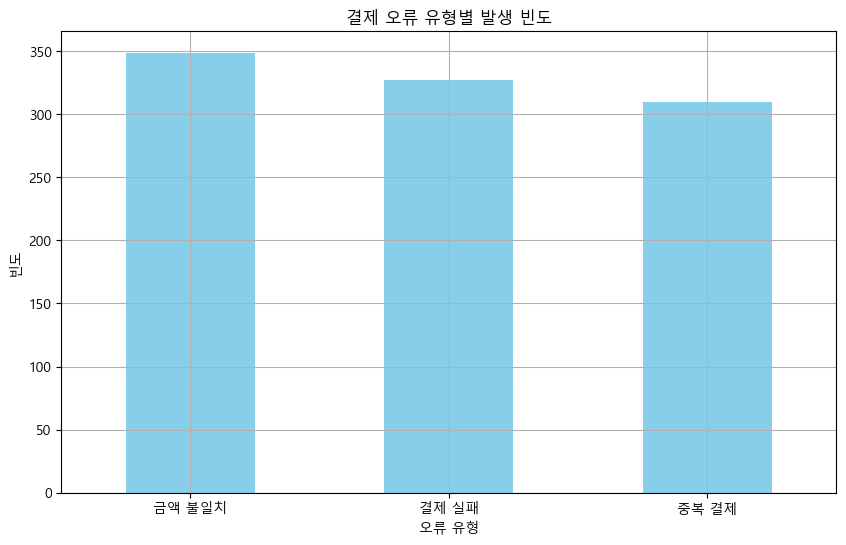

In [24]:
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv('다양한_가상_결제_데이터셋.csv')

# 결제 오류 식별
error_data = data[data['오류 코드'].notna()].copy()

# 오류 유형별 발생 빈도
error_type_counts = error_data['오류 코드'].value_counts()

# 결제 오류 유형별 발생 빈도 시각화
plt.figure(figsize=(10, 6))
error_type_counts.plot(kind='bar', color='skyblue')
plt.title('결제 오류 유형별 발생 빈도')
plt.xlabel('오류 유형')
plt.ylabel('빈도')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


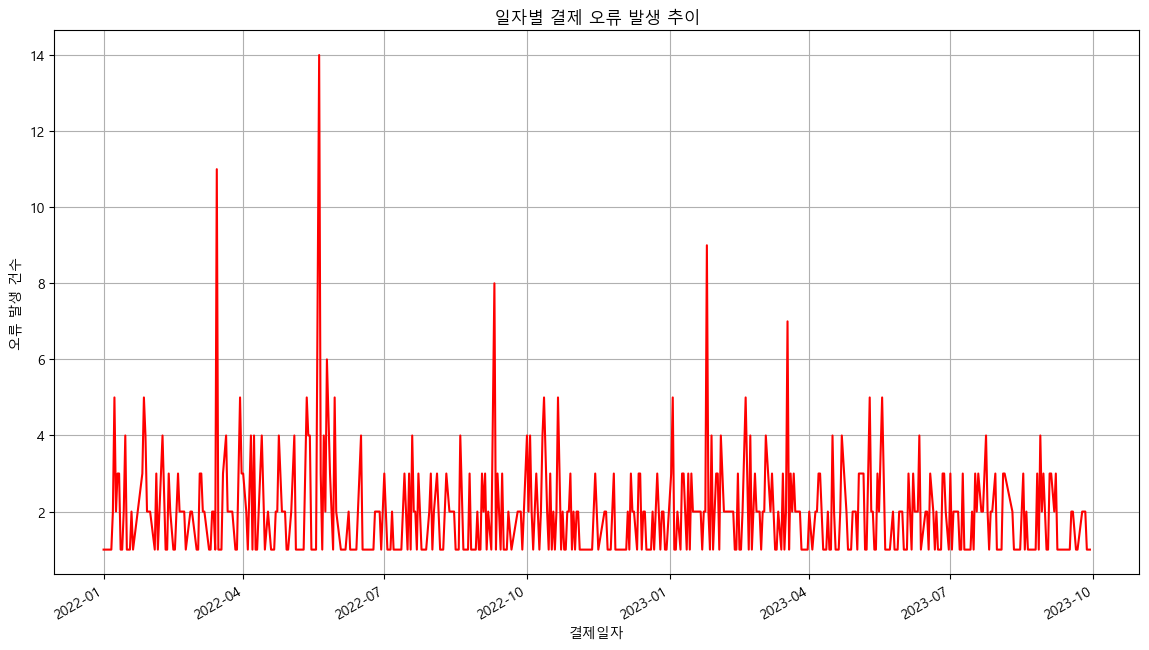

In [23]:
# 일자별 결제 오류 발생 추이
error_data.loc[:, '결제일자'] = pd.to_datetime(error_data['결제일자'])
daily_error_counts = error_data.groupby('결제일자').size()

# 일자별 결제 오류 발생 추이 시각화
plt.figure(figsize=(14, 8))
daily_error_counts.plot(color='red')
plt.title('일자별 결제 오류 발생 추이')
plt.xlabel('결제일자')
plt.ylabel('오류 발생 건수')
plt.grid(True)
plt.show()

In [25]:
# 금액 불일치 오류 수정
corrected_data = data.copy()
mean_payment_amount = corrected_data['결제 금액'].mean()
corrected_data.loc[corrected_data['오류 코드'] == '금액 불일치', '결제 금액'] = mean_payment_amount

In [27]:
# 결제 실패 오류 수정 (예시: 실패한 결제를 재시도하거나 원인을 분석하여 수정)
# 예시로는 재시도 후 결제가 성공한 것으로 처리
corrected_data.loc[corrected_data['오류 코드'] == '결제 실패', '결제 금액'] = corrected_data['결제 금액'] * 1.1  # 예: 재결제 후 성공

In [28]:
# 중복 결제 오류 수정 (예시: 중복된 결제 중 하나를 취소)
# 중복 결제 발생 시, 해당 결제 금액을 0으로 처리
corrected_data.loc[corrected_data['오류 코드'] == '중복 결제', '결제 금액'] = 0

In [30]:
# 날짜 형식 변환
data['결제일자'] = pd.to_datetime(data['결제일자'])
corrected_data['결제일자'] = pd.to_datetime(corrected_data['결제일자'])

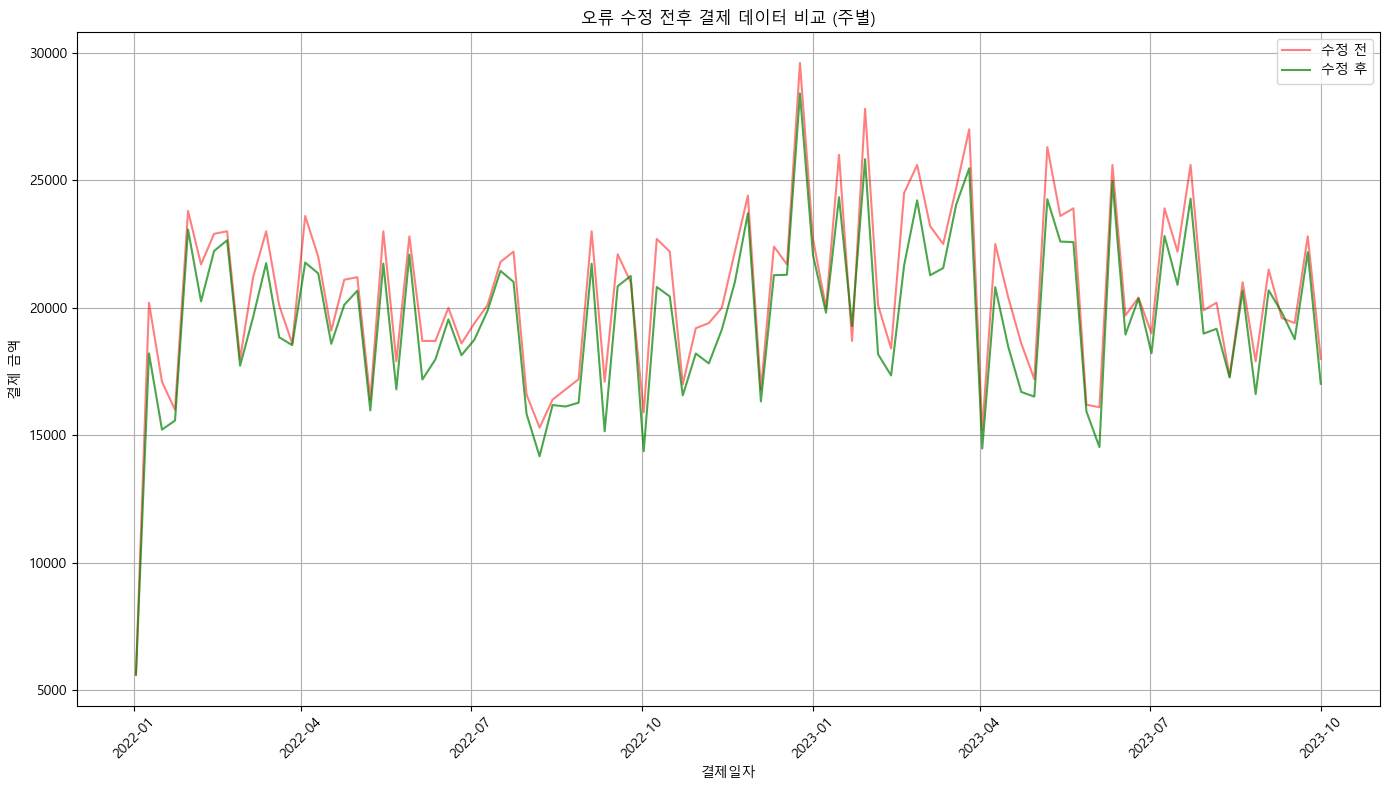

In [35]:
# 주별 데이터 집계
data.set_index('결제일자', inplace=True)
corrected_data.set_index('결제일자', inplace=True)
weekly_data = data.resample('W').sum()
weekly_corrected_data = corrected_data.resample('W').sum()

# 오류 수정 전후 결제 금액 비교 (주별)
plt.figure(figsize=(14, 8))
plt.plot(weekly_data.index, weekly_data['결제 금액'], label='수정 전', alpha=0.5, color='red')
plt.plot(weekly_corrected_data.index, weekly_corrected_data['결제 금액'], label='수정 후', alpha=0.7, color='green')
plt.title('오류 수정 전후 결제 데이터 비교 (주별)')
plt.xlabel('결제일자')
plt.ylabel('결제 금액')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

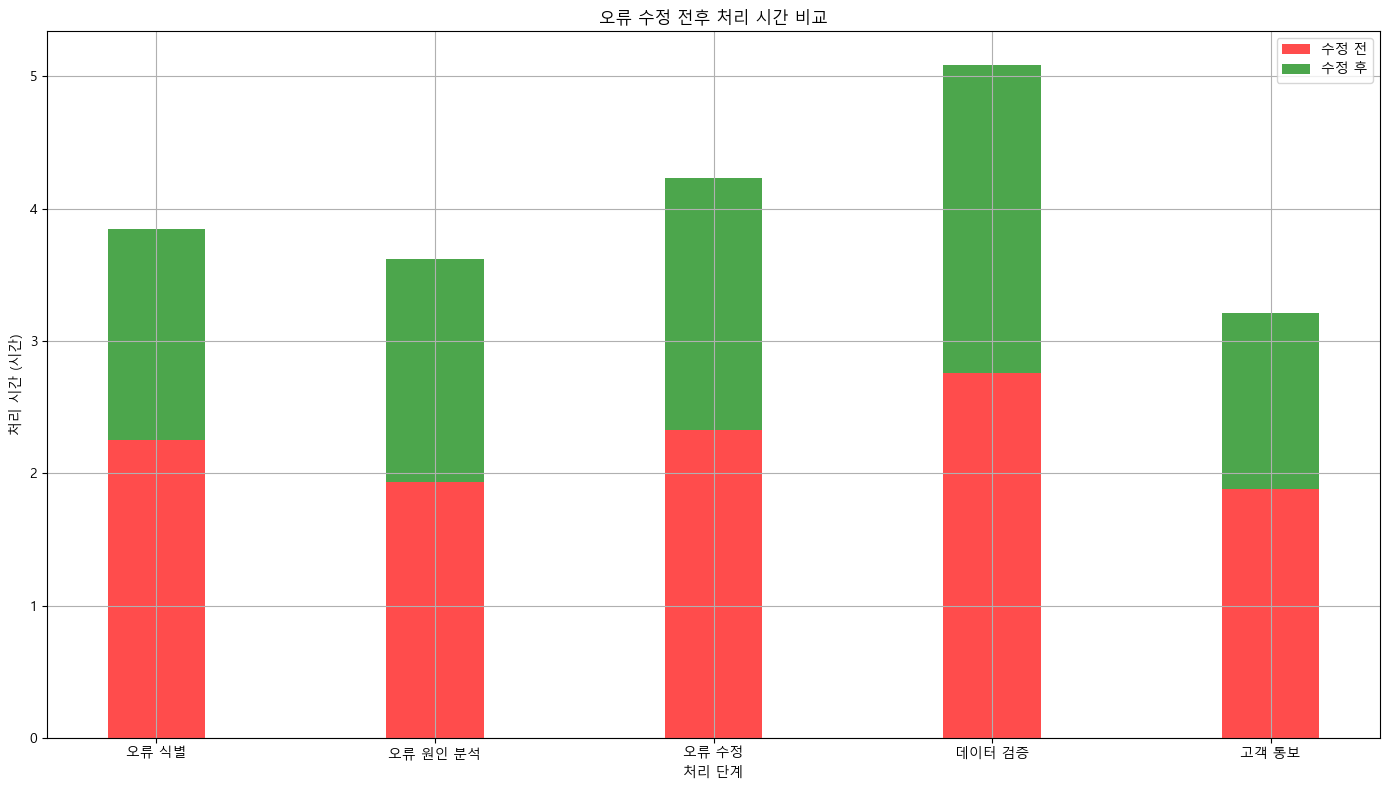

In [36]:
# 샘플 데이터 준비
np.random.seed(42)

# 오류 수정 전후 처리 시간 (단위: 시간)
process_steps = ['오류 식별', '오류 원인 분석', '오류 수정', '데이터 검증', '고객 통보']
process_time_before = np.random.normal(loc=2, scale=0.5, size=len(process_steps))
process_time_after = process_time_before * np.random.uniform(0.7, 0.9, size=len(process_steps))

# 데이터프레임 생성
process_time_df = pd.DataFrame({
    '단계': process_steps,
    '수정 전': process_time_before,
    '수정 후': process_time_after
})

# 시각화
fig, ax = plt.subplots(figsize=(14, 8))
width = 0.35

# 바 그래프 생성
ax.bar(process_time_df['단계'], process_time_df['수정 전'], width, label='수정 전', color='red', alpha=0.7)
ax.bar(process_time_df['단계'], process_time_df['수정 후'], width, label='수정 후', color='green', alpha=0.7, bottom=process_time_df['수정 전'])

# 그래프 설정
ax.set_xlabel('처리 단계')
ax.set_ylabel('처리 시간 (시간)')
ax.set_title('오류 수정 전후 처리 시간 비교')
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()